# 🥇 Análisis del Top 10 Histórico de Países en Juegos Olímpicos

Esta notebook analiza cómo ha variado el top 10 de países en función de la cantidad total de medallas obtenidas a lo largo de los Juegos Olímpicos. Se consideran todas las ediciones disponibles en el dataset.

El objetivo es identificar qué países han dominado históricamente y cómo ha evolucionado su rendimiento con el tiempo.

Fuente de datos: Wikipedia (medallas_historicas.csv)


# Carga de datos y configuración

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración general
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

# Cargar dataset
df = pd.read_csv("../data/medallas_historicas.csv")

# Limpieza básica de columnas
df.columns = df.columns.str.strip()
df.head()

,Año,País,Oro,Plata,Bronce,Total
0,1896,United States,11,7,2,20
1,1896,Greece,10,18,19,47
2,1896,Germany,6,5,2,13
3,1896,France,5,4,2,11
4,1896,Great Britain,2,3,2,7


# Resumen

In [2]:
print("Columnas disponibles:", df.columns.tolist())
print("\nResumen del dataset:")
df.info()


Columnas disponibles: ['Año', 'País', 'Oro', 'Plata', 'Bronce', 'Total']

Resumen del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1063 entries, 0 to 1062
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Año     1063 non-null   int64 
 1   País    1063 non-null   object
 2   Oro     1063 non-null   int64 
 3   Plata   1063 non-null   int64 
 4   Bronce  1063 non-null   int64 
 5   Total   1063 non-null   int64 
dtypes: int64(5), object(1)
memory usage: 50.0+ KB


# Encontrar las 10 paises con más medallas
A continuación se agruparon las medallas totales por país para encontrar los 10 paises más ganadores.

In [3]:
# Agrupar por país y sumar medallas
top10_total = df.groupby("País")["Total"].sum().sort_values(ascending=False).head(10)
top10_paises = top10_total.index.tolist()

print("Top 10 países históricos:")
print(top10_total)


Top 10 países históricos:
País
United States    2768
Soviet Union     1010
Great Britain     991
France            830
China             727
Germany           705
Italy             669
Australia         598
Japan             543
Hungary           524
Name: Total, dtype: int64


## 📈 Evolución en el tiempo del Top 10
Utilizando la lista de paises más ganadores se filtró la lista completa de medallas por país, obteniendo un dataframe histórico que solo incluye los paises seleccionados.
Luego se gráfico el desempeño histórico de los mismos.

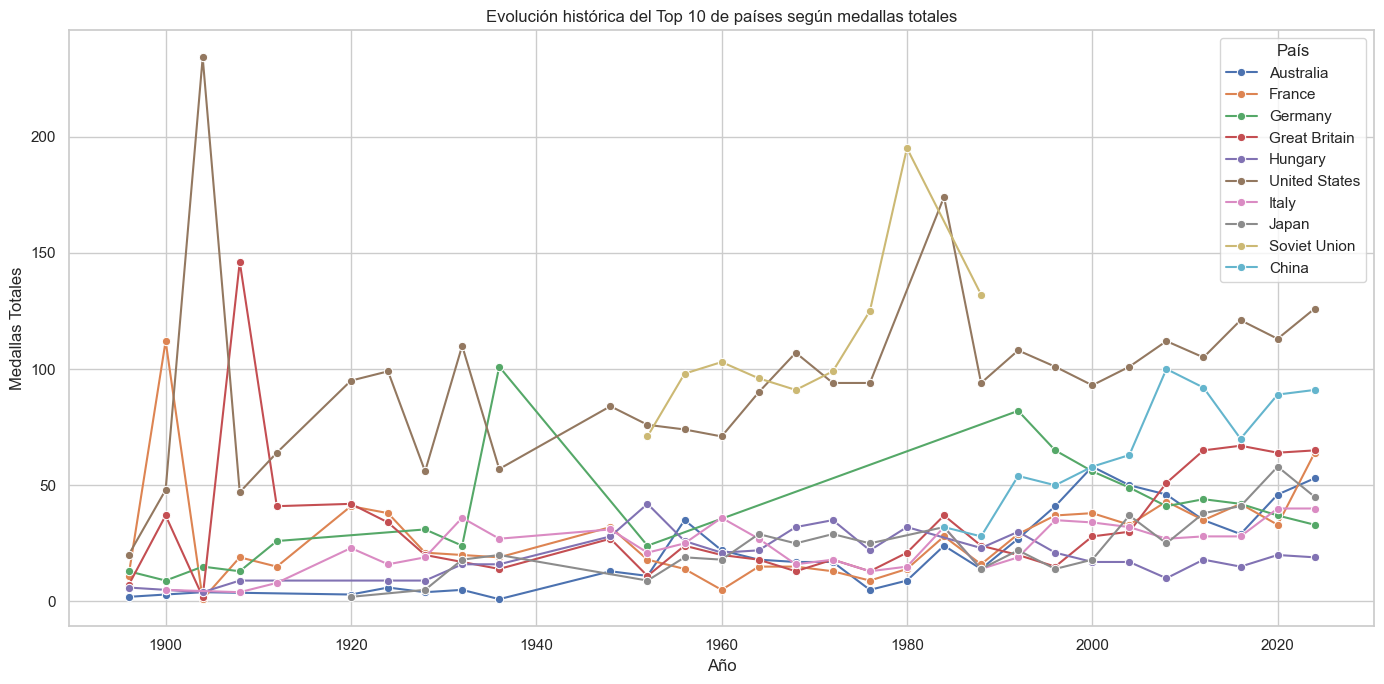

In [10]:
# Filtrar solo los países top 10
df_top10 = df[df["País"].isin(top10_paises)]

# Agrupar por año y país
evolucion = df_top10.groupby(["Año", "País"])["Total"].sum().reset_index()

# Gráfico de evolución
plt.figure(figsize=(14, 7))
sns.lineplot(data=evolucion, x="Año", y="Total", hue="País", marker="o")
plt.title("Evolución histórica del Top 10 de países según medallas totales")
plt.xlabel("Año")
plt.ylabel("Medallas Totales")
plt.legend(title="País")
plt.tight_layout()
plt.savefig("../images/top10_evolucion.png", dpi=300, bbox_inches="tight")
plt.show()



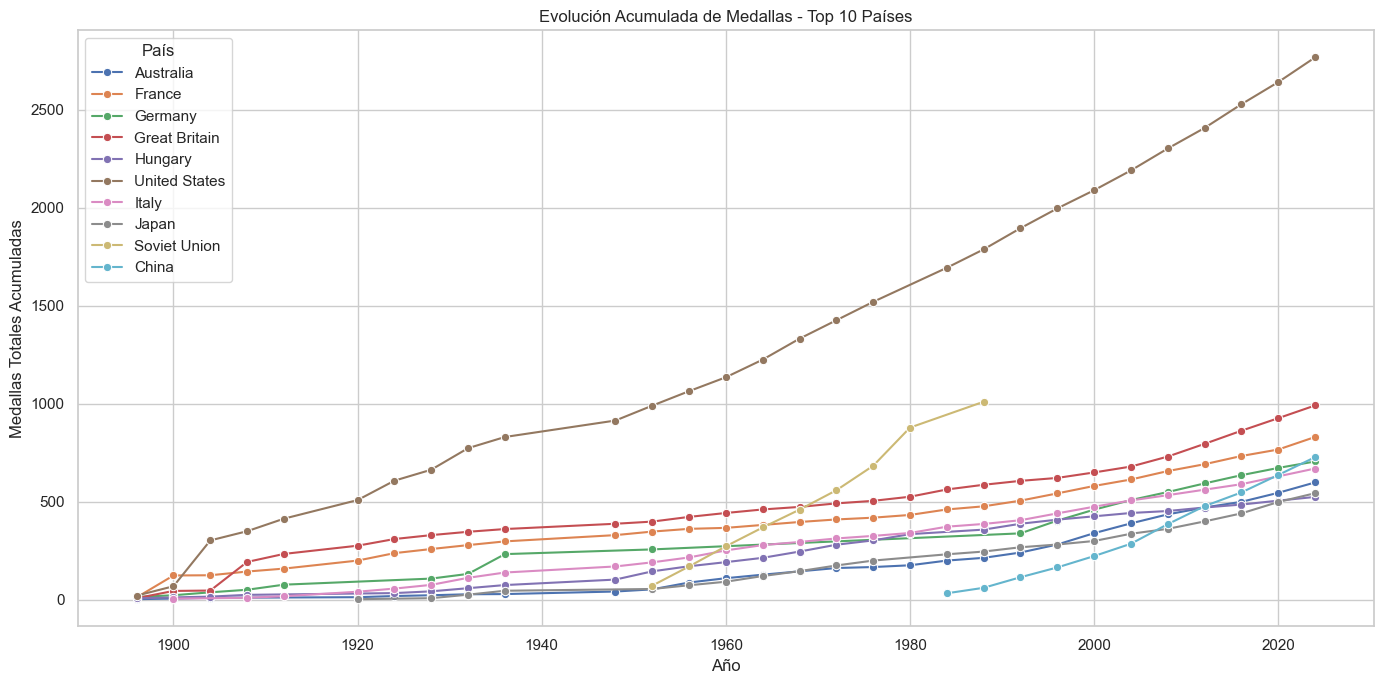

In [11]:
evolucion["Acumulado"] = evolucion.groupby("País")["Total"].cumsum()

plt.figure(figsize=(14, 7))
sns.lineplot(data=evolucion, x="Año", y="Acumulado", hue="País", marker="o")
plt.title("Evolución Acumulada de Medallas - Top 10 Países")
plt.xlabel("Año")
plt.ylabel("Medallas Totales Acumuladas")
plt.legend(title="País")
plt.tight_layout()
plt.savefig("../images/top10_evolucion_acumulada.png", dpi=300, bbox_inches="tight")
plt.show()

# Apariciones en el top 10 por pais
 A continuación se construyó un ranking anual calculando los 10 paises con más medallas en cada edición. Luego se determinó la frecuencia de aparición en el mismo de cada páis y se gráficó

C:\Users\cs_ln\AppData\Local\Temp\ipykernel_13968\415413272.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=apariciones_top10, x="Apariciones", y="País", palette="viridis")


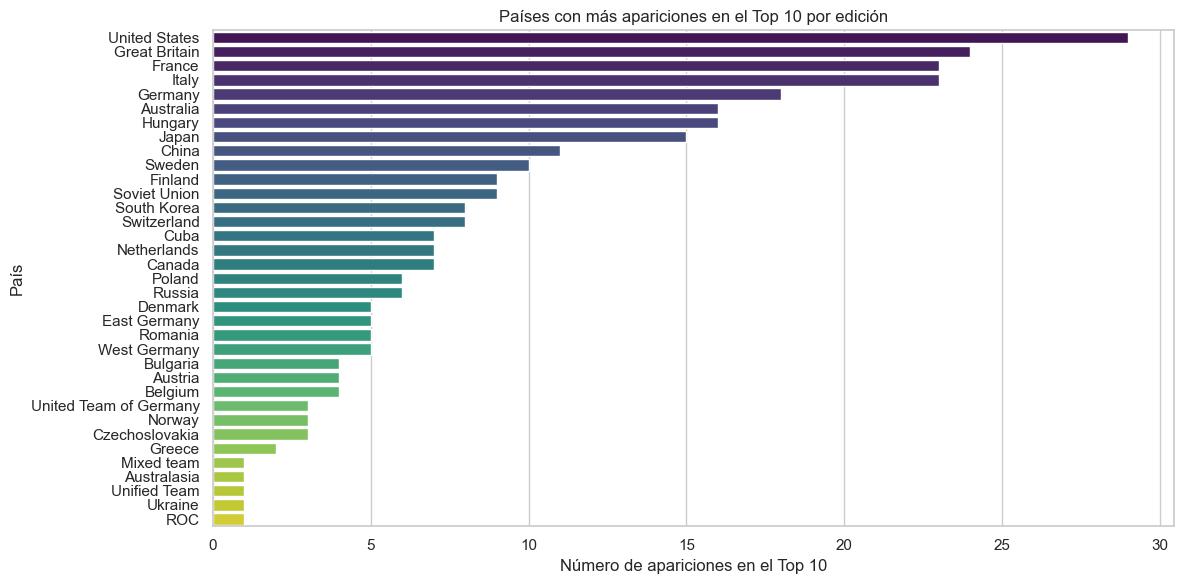

In [5]:
# Crear ranking por año y obtener top 10 por edición
ranking_anual = (
    df.groupby(["Año", "País"])["Total"]
    .sum()
    .reset_index()
    .sort_values(["Año", "Total"], ascending=[True, False])
)

top10_por_anio = ranking_anual.groupby("Año").head(10)

# Contar apariciones en el top 10 y convertir a DataFrame
apariciones_top10 = top10_por_anio["País"].value_counts().reset_index()
apariciones_top10.columns = ["País", "Apariciones"]
apariciones_top10 = apariciones_top10.sort_values("Apariciones", ascending=False)

# Visualización
plt.figure(figsize=(12, 6))
sns.barplot(data=apariciones_top10, x="Apariciones", y="País", palette="viridis")
plt.title("Países con más apariciones en el Top 10 por edición")
plt.xlabel("Número de apariciones en el Top 10")
plt.ylabel("País")
plt.tight_layout()
plt.savefig("../images/top10_apariciones.png", dpi=300, bbox_inches="tight")
plt.show()


# Permanencia en el top 10
Para finalizar se construyó una lista con los paises que más veces aparecen en el top 10 y se gráficó la evolución de los mismos en el top 10 a lo largo del tiempo.

       Año           País  Total  Ranking
10    1896  United States     20      2.0
4     1896        Germany     13      3.0
3     1896         France     11      4.0
5     1896  Great Britain      7      5.0
7     1896        Hungary      6      7.0
0     1896      Australia      2     10.0
17    1900         France    112      1.0
28    1900  United States     48      2.0
19    1900  Great Britain     37      3.0
18    1900        Germany      9      6.0
20    1900        Hungary      5     10.0
22    1900          Italy      5     11.0
11    1900      Australia      3     13.0
26    1900         Sweden      1     18.0
41    1904  United States    234      1.0
34    1904        Germany     15      2.0
29    1904      Australia      4      4.0
37    1904        Hungary      4      5.0
35    1904  Great Britain      2      9.0
33    1904         France      1     12.0
51    1908  Great Britain    146      1.0
59    1908  United States     47      2.0
58    1908         Sweden     25  

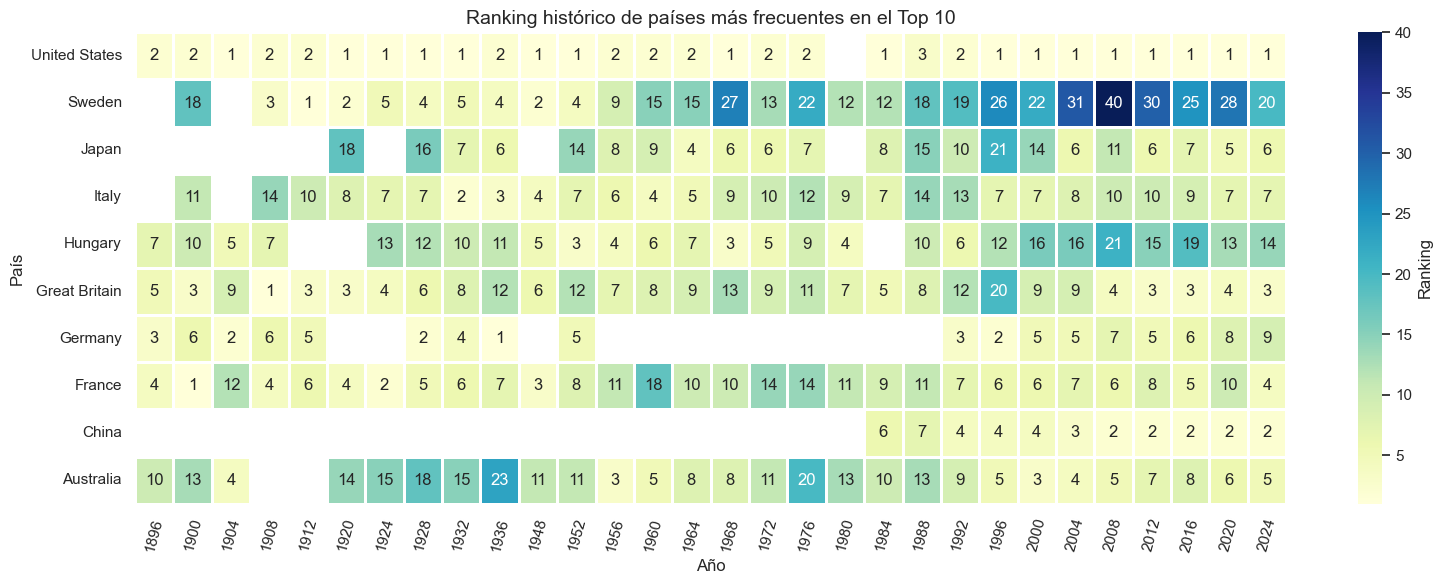

In [8]:
# Crear columna de ranking dentro de cada año
ranking_anual["Ranking"] = ranking_anual.groupby("Año")["Total"].rank(ascending=False, method="first")

# Filtrar los países más frecuentes en el top 10
paises_frecuentes = apariciones_top10.head(10)["País"].tolist()

# Filtrar datos del ranking
ranking_filtrado = ranking_anual[ranking_anual["País"].isin(paises_frecuentes)]
print(ranking_filtrado.to_string())

# Pivotear para construir matriz del heatmap
pivot = ranking_filtrado.pivot(index="País", columns="Año", values="Ranking")

# Crear heatmap 
plt.figure(figsize=(16, 6))
sns.heatmap(
    pivot,
    cmap="YlGnBu",
    annot=True,
    fmt=".0f",
    linewidths=1,            
    cbar_kws={"label": "Ranking"}
)

# Estética
plt.grid(False)  
plt.title("Ranking histórico de países más frecuentes en el Top 10", fontsize=14)
plt.xlabel("Año")
plt.ylabel("País")
plt.gca().invert_yaxis()
plt.xticks(rotation=75, ha="center")
plt.tight_layout()

# Guardar y mostrar
plt.savefig("../images/prevalencia_en_top10", dpi=300, bbox_inches="tight")
plt.show()
